# Lecture 5 Text Mining

Many of the examples below are taken from the [NLTK book](http://www.nltk.org/book/) Before we start, we should install all the required material. Run the cell below to install the tools and corpora. This can take a minute...

Please run the cell below to install the additional material.

In [228]:
%matplotlib inline
import nltk
nltk.download('book')

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/kasparbeelen/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/kasparbeelen/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /Users/kasparbeelen/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/kasparbeelen/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /Users/kasparbeelen/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /Users/kasparbeelen/nltk_data...
[nltk_data]    |   Package conll2002 is alread

True

### Introduction to Python's Natural Language Toolkit (NLTK)

First, I demonstrate the power of the NLTK by inspecting some of the **prepared corpora** of this library. Later on, I show how you can build your own corpus, and unleash all the nice tools on **your own data**.

In the Digital Humanities, we often treat texts as *raw data*, as input for our programs. Interpretations arise from abstraction, for example, by counting word frequencies, analysing specific segments of a corpus (i.e. Key Word In Context, or KWIC analysis) or searching for patterns (i.e. collocations). 

NLTK provides several tools for both **processing** data and **interpreting** texts.

Let's inspect the tools NLTK provides us with.

NLTK helps us with "tokenization" a tool that helps to break a string into separate words (also called tokens).

We first need to import the `word_tokenize` tool using the `import` syntax below.

In [ ]:
from nltk.tokenize import word_tokenize

We can apply this function to any English text and it will identify the tokens and separate strings from punctation.

In [230]:
example_sentence = "Downing Street has said it is “extremely concerning” that MPs could attempt to override the government to suspend or delay the article 50 process to leave the EU in their effort to prevent a no-deal Brexit."
print(example_sentence)

Downing Street has said it is “extremely concerning” that MPs could attempt to override the government to suspend or delay the article 50 process to leave the EU in their effort to prevent a no-deal Brexit.


A string is just a sequence of characters. However, for simple tasks, such as word counting, we need to split up this string by token.

Below we first lowercase the string and then tokenize it.

In [231]:
example_sentence_lower = example_sentence.lower()

In [232]:
words = word_tokenize(example_sentence_lower)
print(words)

['downing', 'street', 'has', 'said', 'it', 'is', '“', 'extremely', 'concerning', '”', 'that', 'mps', 'could', 'attempt', 'to', 'override', 'the', 'government', 'to', 'suspend', 'or', 'delay', 'the', 'article', '50', 'process', 'to', 'leave', 'the', 'eu', 'in', 'their', 'effort', 'to', 'prevent', 'a', 'no-deal', 'brexit', '.']


#### Exercise

Select the first sentence of [Alice in Wonderland](http://www.gutenberg.org/cache/epub/28885/pg28885.txt) and tokenize the string.

After tokenization we can easily compute the word frequency with the `nltk.FreqDist()` function.

In [168]:
nltk.FreqDist(words)

FreqDist({'.': 1,
          '50': 1,
          'a': 1,
          'article': 1,
          'attempt': 1,
          'brexit': 1,
          'concerning': 1,
          'could': 1,
          'delay': 1,
          'downing': 1,
          'effort': 1,
          'eu': 1,
          'extremely': 1,
          'government': 1,
          'has': 1,
          'in': 1,
          'is': 1,
          'it': 1,
          'leave': 1,
          'mps': 1,
          'no-deal': 1,
          'or': 1,
          'override': 1,
          'prevent': 1,
          'process': 1,
          'said': 1,
          'street': 1,
          'suspend': 1,
          'that': 1,
          'the': 3,
          'their': 1,
          'to': 4,
          '“': 1,
          '”': 1})

If we'd like to know the frequency of one specific word we put this word in between square brackets.

In [169]:
fq = nltk.FreqDist(words)
fq['the']

3

#### Exercise

What is the frequency of 'to' and 'street'?

In [ ]:
# insert code here

To compute the relative frequency, the count has to be divided by the total number of tokens.

In [233]:
total_words = len(words)
fq['the']/total_words

0.07692307692307693

#### Exercise

The code below downloads the text of Shakespeare's Romeo and Juliet and saves it in the variable `randj`.
Perform the following steps:
- Lowercase the text;
- Tokenize the lowercased text; save the tokens in a new variable with the name `randj_tokens`.
- How many tokens does Romeo and Julia contain? How many characters?
- Make a frequency table, compute the relative frequency of the word "love"

In [97]:
import requests
randj = requests.get('http://www.gutenberg.org/cache/epub/1112/pg1112.txt').text

In [ ]:
# insert code here

## Text in Context

After tokenizing the text we can apply a bunch of NLTK tools. Below we use the example of Kipling's [Jungle Book](http://www.gutenberg.org/cache/epub/35997/pg35997.txt). 

We first tokenize the book.

In [171]:
import requests
jungle_book = requests.get('http://www.gutenberg.org/cache/epub/35997/pg35997.txt').text
jungle_book_tokens = word_tokenize(jungle_book)

In [172]:
type(jungle_book_tokens)

list

`word_tokenize` returns a `list` object. Lists are useful for storing information, but not for analysing texts. To allow for more refined text analysis we have to convert the list to a NLTK Text object. This type conversion (from list to NLTK text is done below).

In [175]:
jungle_nltk_text = nltk.text.Text(jungle_book_tokens)

In [176]:
type(jungle_nltk_text)

nltk.text.Text

Once we tranformed the text into an NLTK Text object we can rely on several handy tools.

### `.concordance()`

An oft-used technique for distant reading is **Keyword In Context Analysis** in which we centre a whole corpus on a specific word of interest. NLTK comes with a `concordance()` method that allows you to do just this. Let's analyse how the word "love" in Jungle book:

In [184]:
jungle_nltk_text.concordance("love")

Displaying 9 of 9 matches:
in the jungle for fear of those that love thee ; but remember , Akela is very 
s , and I was born among men , and I love thee , Little Brother . The others t
I or Baloo or those of the Pack that love thee . Get the Red Flower . '' By Re
 bruised from head to foot by me who love him than that he should come to harm
e jungles ; and besides , I -- we -- love him , Kaa . '' `` _Ts ! Ts ! _ '' sa
 and fro . `` I also have known what love is . There are tales I could tell th
ever . I will always remember that I love thee and all in our cave ; but also 
Shere Khan gives me his coat for the love that he bears me . Pull , Gray Broth
ce . I am getting old , and I do not love wild elephants , Give me brick eleph


We can specify the number of hits to print with the `lines` argument.

In [185]:
jungle_nltk_text.concordance("black",lines=35)

Displaying 35 of 35 matches:
could handle a buck alone , to young black three-year-olds who thought they cou
bs . Who speaks besides Baloo ? '' A black shadow dropped down into the circle 
o the circle . It was Bagheera , the Black Panther , inky black all over , but 
 Bagheera , the Black Panther , inky black all over , but with the panther mark
th his head on Bagheera 's beautiful black skin : `` Little Brother , how often
thou_ art a man 's cub , '' said the Black Panther , very tenderly ; '' and eve
nly ; and he frowned under his heavy black eyebrows . `` What is the Law of the
get up and feed it in the night with black lumps ; and when the morning came an
s the boy stood all naked , his long black hair tossing over his shoulders in t
than this . Sometimes Bagheera , the Black Panther , would come lounging throug
 think how small he is , '' said the Black Panther , who would have spoiled Mow
? Put dead bats on my head ! Give me black bones to eat ! Roll me into the hive
at would th

#### Exercise

How is the word love used in Romeo and Juliet? The code below downloads Romeo and Juliet, continue the code.

In [186]:
import requests
randj = requests.get('http://www.gutenberg.org/cache/epub/1112/pg1112.txt').text

### `.similar()`

`concordance()` shows words in their context. For example, in Moby Dick the word monstrous occurres in contexts such as the \_\_\_ pictures and a \_\_\_ size. What other words appear in a **similar range of contexts**? We can find out by using the `.similar()` method, entering the word you want analyse within parentheses. Below we aks which words are similar to "forest".

In [189]:
jungle_nltk_text.similar("forest")

jungle air world clearing ground pack elephants cave skin sea head
other village beasts darkness water monkeys reward beach mule


### 1. Research Scenario: How left and right-wing media depict Mueller

The research scenario below applies these techniques to understand how the New York times depicts Robert S. Mueller. First we load the data.

Don't worry about the technicality on line two: this command basically tells Python to read everything in "post_message" columns as a string.

In [203]:
nyt = pd.read_csv('https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/lecture_3_data/nytimes.tab',sep='\t')
nyt['post_message'] = nyt['post_message'].astype(str) # this line is a technicality, use it but do not worry

Before we can tokenize the post messages, we have to join them together in one string. `' '.join()` is the opposite of `.split()`. Inspect the examples below to understand how these functions work.

In [209]:
sentence = 'Hello how are you?'
words = sentence.split()
words

['Hello', 'how', 'are', 'you?']

In [212]:
print(type(words))

<class 'list'>


In [211]:
sentence_merged =  ' '.join(words)
sentence_merged

'Hello how are you?'

In [213]:
print(type(sentence_merged))

<class 'str'>


To apply the NLTK tools to Facebook "post_messages" we first select this column, join all the messages into one long string, which is saved in the `posts` variable.

In [214]:
posts = ' '.join(nyt['post_message'])

Once all the post messages are stored in one string. This string is tokenized with `word_tokenize` and then convert this list to a NLTK object.

In [215]:
posts_tokens = word_tokenize(posts)
nltk_posts = nltk.text.Text(posts_tokens)

In [216]:
nltk_posts.concordance("Mueller")

Displaying 7 of 7 matches:
 the team of Special Counsel Robert Mueller has been extended Fox News has lear
t s time for Special Counsel Robert Mueller to put up or shut up . Amazon could
ime to strongly consider firing Bob Mueller . – Dan Bongino https : //bit.ly/2w
 Duncan said Special Counsel Robert Mueller ’ s team was one holdout juror away
ain rally tonight . For months team Mueller has unsuccessfully tried to turn th
s brought by Special Counsel Robert Mueller . https : //fxn.ws/2JOF1vN BREAKING
tions of former FBI Director Robert Mueller who now leads the special counsel R


#### Exercise

How does Fox News report about Mueller? Use [these data](https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/lecture_3_data/foxnews.tab).


In [ ]:
# insert these data

#### \*\*\* Exercise

Instead of the post messages, compare how commenters on the Facebook page of the New York Times and Fox News write about Mueller?

## 2. Research Scenario: Studying changes over time

Besides inspecting the content, we can study changes over time. What are topics salient and when do they disappear. Below we have a look at the comments on the New York Times.

Before looking at trends, the data has to be sorted in chronological order. We use the timestamp of the comment to sort the DataFrame.

In [221]:
url = "https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/data_nytimes/page_5281959998_2018_12_28_22_00_39_comments.tab"
nyt_comments = pd.read_csv(url,sep='\t')
nyt_comments_sorted = nyt_comments.sort_values(by='comment_published')

In [225]:
nyt_comments_sorted.head(3)

,position,post_id,post_by,post_text,post_published,comment_id,comment_by,is_reply,comment_message,comment_published,comment_like_count,attachment_type,attachment_url
16123,49_408,5281959998_10151785245419999,825d8dd2a27d4f84aec9008bf96872ffb2a4a4ad,Republican leaders gave up hope on Thursday of...,2018-12-27T22:55:00+0000,10151785245419999_10151785253979999,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,Won’t they just pass a CR to reopen?,2018-12-27T22:56:38+0000,8,NaN,NaN
16417,49_702,5281959998_10151785245419999,825d8dd2a27d4f84aec9008bf96872ffb2a4a4ad,Republican leaders gave up hope on Thursday of...,2018-12-27T22:55:00+0000,10151785245419999_10151785253984999,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,"Damn you, Mexico! You should’ve paid for the s...",2018-12-27T22:56:39+0000,1,NaN,NaN
15981,49_266,5281959998_10151785245419999,825d8dd2a27d4f84aec9008bf96872ffb2a4a4ad,Republican leaders gave up hope on Thursday of...,2018-12-27T22:55:00+0000,10151785245419999_10151785254124999,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,#TrumpShutdown,2018-12-27T22:56:52+0000,115,NaN,NaN


After sorting the data, we first make sure all the data in this column is a string. 
- Then we again join all the comments into one long string. 
- Tokenize this string.
- And convert the list of tokens to a NLTK Text object.

In [226]:
nyt_comments_sorted['comment_message'] = nyt_comments_sorted['comment_message'].astype(str)

In [146]:
comments = ' '.join(nyt_comments_sorted['comment_message'])
comments_tokens = word_tokenize(comments)
nltk_comments = nltk.text.Text(comments_tokens)

Once all the comments are stored as a NLTK Text object we can generate a `.dispersion()` plot.

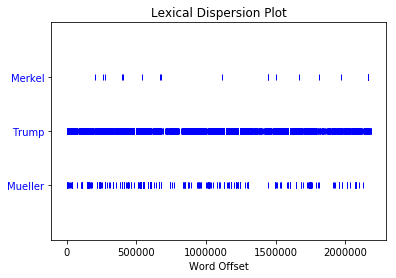

In [227]:
nltk_comments.dispersion_plot(['Merkel','Trump','Mueller'])

#### Question

How to interpret this figure?

#### \*\*\* Exercise

Use posts from the [New York Times](https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/lecture_3_data/nytimes.tab) and [Fox News](https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/lecture_3_data/foxnews.tab).
For each page:
- Sort the data by the posts' Timestamp;
- Select the text and `.join()` them into one string
- Tokenize the text
- Compute word frequencies; compute the relative frequency for the word Trump

In [241]:
# insert code here

#### \*\*\* Exercise

Use posts from the [New York Times](https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/lecture_3_data/nytimes.tab) and [Fox News](https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/lecture_3_data/foxnews.tab).
For each page:
- Sort the data by the post's Timestamp;
- Select the text and `.join()` them into one string
- Tokenize the text
- Compute word frequencies; compute the relative frequency for the word "Trump"
- Make a dispersion plot for 'Kelly','Cohen','Pelosi', and 'Trump'

In [240]:
# insert code here

#### \*\*\* Exercise

In this exercise, we will investigate the text of Facebook posts in relation to the reactions they received. More specifically we look what makes these audiences angry or happy when these media write about Trump.

Use these data
- [New York Times]('https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/lecture_3_data/nytimes.tab')
- [Fox News]('https://raw.githubusercontent.com/kasparvonbeelen/CTH2019/master/lecture_3_data/foxnews.tab')

So, again for each of these pages:
- Compute the ratio of angry and love reactions (by dividing the this reactions type to the total reactions)
- Select posts with a ratio of love (or angry) rections higher than 0.3
- Save the posts that match these conditions in a new DataFrame (for example `df_nyt_angry`)
- Concatenate all these posts into one string, split this string into tokens and convert the list of tokens to a NLTK Text object
- Use `.concordance()` to investigate what these supposedly angry or happy posts are about? 

In [253]:
# insert code here

In [ ]:
# Now you know everything enough! Congratulations with 

## 3. Optional Research Scenario: Training an ideological classifier (Advanced Topic)

The part below is optional. It gives code to train an ideology classifier.

In [308]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score,accuracy_score  

Download the "cldata.csv" on Canvas. This contains rows with texts and labels."0" means that the post was retrieved from the New York Times, "1" that comments was writen on the Fox News page.

In [304]:
all_data = pd.read_csv('cldata.csv',index_col=0)
all_data.head()

,comment_message,label
65701,They should remove their license they could ha...,1
34276,Gowdy for President. I'm sure he is Republican...,1
37792,I am 16 months older then my brother. I can ...,1
13332,"Whatever it is, it's creepy and they aren't ge...",1
16516,What's with her rigid hand movements when she ...,1


In [ ]:
To understand how the data was created, consult the appendix below.

We divide the data into a train and test set. We use 80% for training, 20% for testing.

In [305]:
cut_off = int(all_data.shape[0]*0.8)
cut_off

103288

In [279]:
train,y_train = all_data['comment_message'][:cut_off],all_data['label'][:cut_off]

In [281]:
test,y_test = all_data['comment_message'][cut_off:],all_data['label'][cut_off:]

Subsequently we use the CountVectorizer to create a [document-term matrix](https://en.wikipedia.org/wiki/Document-term_matrix). To understand the arguments, consult the [CountVectorizer documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).

In [282]:
vectorizer = CountVectorizer(ngram_range=(1,3),max_df=0.9,min_df=20,norm='l1')

In [283]:
X_train = vectorizer.fit_transform(train)

In [284]:
X_test = vectorizer.transform(test)

The code below initializes a classifier model and fits the parameters.

In [285]:
classifier = LinearSVC(C=10,class_weight='balanced')
classifier.fit(X_train,y_train)

After training the model, we calculate labels for the data we separated for testing purposes.

In [306]:
predictions = classifier.predict(X_test)

And compute how accurarte the classifier performed on these test examples.

In [309]:
score = accuracy_score(predictions,y_test)
print(score)

0.7377817365037564


#### \*\*\* Building an Emotion Classifier (Optional)

### Appendix

Code to create classifier data from Netvizz data

In [300]:
import random
from nltk.tokenize import wordpunct_tokenize

def count_tokens(string):
    tokens = wordpunct_tokenize(str(string))
    return len(tokens)

nyt = pd.read_csv('../classifierdata/nyt_comments.tab',sep='\t')
fn = pd.read_csv('../classifierdata/fn_comments.tab',sep='\t')
nyt['comment_message_length'] = nyt['comment_message'].apply(count_tokens)
fn['comment_message_length'] = fn['comment_message'].apply(count_tokens)
nyt_long = nyt[nyt['comment_message_length'] > 10]
fn_long = fn[fn['comment_message_length'] > 10]
fn_long_reduced = fn_long.iloc[:nyt_long.shape[0],:]
all_data = pd.concat([nyt_long,fn_long_reduced])
labels = np.asarray([0]*nyt_long.shape[0] + [1]*fn_long_reduced.shape[0])
all_data.shape[0]==labels.shape[0]
all_data['label'] = labels
order = np.asarray(range(0,all_data.shape[0]))
random.shuffle(order)
all_data = all_data.iloc[order,:]
cldata = all_data.loc[:,['comment_message','label']]
cldata.to_csv('cldata.csv')